In [1]:
import pandas as pd
import numpy as np

### Elexon load profiles data
#### https://ukerc.rl.ac.uk/DC/cgi-bin/edc_search.pl?GoButton=Detail&WantComp=42&WantResult=&WantText=EDC0000041

Half-hourly electricity daily load profiles for standard UK profile class definitions (01 Domestic Unrestricted; 02 Domestic Economy 7; 03 Non-domestic Unrestricted; 04 Non-domestic Economy 7; 05 Non-domestic Maximum Demand 0-20% Load Factor; 06 Non-domestic Maximum Demand 20-30% Load Factor; 07 Non-domestic Maximum Demand 30-40% Load Factor; 08 Non-domestic Maximum Demand >40% Load Factor) for weekday (Wd), Saturday (Sat), and Sunday (Sun) at five different times of year (Autumn Aut, Winter Wtr, Spring Spr, High Summer HSr, Summer Smr)

In [2]:
url = 'https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/LoadProfile/data/AllProfileClasses.xls'
df = pd.read_excel(url, sheet_name='Introduction', header=5, nrows=8, usecols='A:B')
df = df.set_index('PROFILE DESCRIPTIONS')
df.to_dict()

{'Unnamed: 1': {1: 'Domestic Unrestricted (single rate) ',
  2: 'Domestic Economy 7 (two rate) ',
  3: 'Non-Domestic Unrestricted (single rate) ',
  4: 'Non-Domestic Non-Maximum Demand Economy 7 type (two rate) ',
  5: 'Non-Domestic Maximum Demand Customers with Load Factor 0-20%',
  6: 'Non-Domestic Maximum Demand Customers with Load Factor 20-30%',
  7: 'Non-Domestic Maximum Demand Customers with Load Factor 30-40%',
  8: 'Non-Domestic Maximum Demand Customers with Load Factor >40%'}}

In [3]:
url = 'https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/LoadProfile/data/AllProfileClasses.xls'
dfs = pd.read_excel(url, sheet_name=[
    'Profile Class 1',
    'Profile Class 2',
    'Profile Class 3',
    'Profile Class 4',
    'Profile Class 5',
    'Profile Class 6',
    'ProfileClass 7',
    'Profile Class 8',
])

## Domestic

In [4]:
df = dfs['Profile Class 1'].copy()
df.head()

,Time,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
0,00:30:00,0.28,0.31,0.35,0.29,0.31,0.33,0.27,0.31,0.32,0.29,0.33,0.33,0.33,0.39,0.41
1,01:00:00,0.24,0.27,0.30,0.25,0.27,0.29,0.23,0.26,0.28,0.25,0.29,0.30,0.28,0.32,0.34
2,01:30:00,0.21,0.24,0.24,0.22,0.23,0.25,0.21,0.23,0.25,0.22,0.25,0.27,0.25,0.28,0.30
3,02:00:00,0.20,0.22,0.22,0.21,0.22,0.23,0.20,0.21,0.22,0.21,0.23,0.24,0.23,0.25,0.27
4,02:30:00,0.19,0.20,0.21,0.20,0.21,0.21,0.19,0.20,0.21,0.20,0.22,0.22,0.22,0.23,0.25


In [5]:
dfs['Profile Class 1'].shape

(48, 16)

In [6]:
df.index = pd.timedelta_range(start='00:00:00', periods=48, freq='30min')
df = df.drop(columns=['Time'])
df = df.resample('1H').mean()
df.head()

,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
00:00:00,0.260,0.290,0.325,0.270,0.290,0.310,0.250,0.285,0.300,0.270,0.310,0.315,0.305,0.355,0.375
01:00:00,0.205,0.230,0.230,0.215,0.225,0.240,0.205,0.220,0.235,0.215,0.240,0.255,0.240,0.265,0.285
02:00:00,0.190,0.195,0.205,0.195,0.205,0.205,0.190,0.195,0.205,0.195,0.210,0.215,0.215,0.225,0.240
03:00:00,0.180,0.190,0.190,0.190,0.195,0.200,0.180,0.190,0.190,0.190,0.190,0.195,0.205,0.210,0.215
04:00:00,0.190,0.190,0.185,0.190,0.195,0.195,0.180,0.190,0.190,0.190,0.195,0.190,0.205,0.210,0.210


### Spring

In [7]:
weekdays = np.tile( df['Spr Wd'].values, 5 )
sat = df['Spr Sat'].values
sun = df['Spr Sun'].values
spring_week = np.concatenate( [weekdays, sat, sun] )
spring = np.tile( spring_week, 6 )

### Summer

In [8]:
weekdays = np.tile( df['Smr Wd'].values, 5 )
sat = df['Smr Sat'].values
sun = df['Smr Sun'].values
summer_week = np.concatenate( [weekdays, sat, sun] )
summer = np.tile( summer_week, 10 )

### High Summer

In [9]:
weekdays = np.tile( df['Hsr Wd'].values, 5 )
sat = df['Hsr Sat'].values
sun = df['Hsr Sun'].values
high_summer_week = np.concatenate( [weekdays, sat, sun] )
high_summer = np.tile( high_summer_week, 7 )

### Autumn

In [10]:
weekdays = np.tile( df['Aut Wd'].values, 5 )
sat = df['Aut Sat'].values
sun = df['Aut Sun'].values
autumn_week = np.concatenate( [weekdays, sat, sun] )
autumn = np.tile( autumn_week, 7 )

### Winter

In [11]:
weekdays = np.tile( df['Wtr Wd'].values, 5 )
sat = df['Wtr Sat'].values
sun = df['Wtr Sun'].values
winter_week = np.concatenate( [weekdays, sat, sun] )
winter = np.tile( winter_week, 22 )

### Year

In [12]:
year_from_spring = np.concatenate([ spring, summer, high_summer, autumn, winter ])
len(year_from_spring)

8736

In [13]:
# Spring starts on 29th March -> ~12th week of year
WEEK = 24*7
index = [ (hour % (WEEK*52)) for hour in range( (12-1)*WEEK, (52+12-1)*WEEK ) ]
len(index)

8736

In [14]:
df = pd.DataFrame(year_from_spring, index=index, columns=['kW'])
df.index.name = 'hour'
df

,kW
hour,
1848,0.270
1849,0.215
1850,0.195
1851,0.190
1852,0.190
...,...
1843,0.865
1844,0.800
1845,0.745


In [15]:
df = df.sort_index()
df

,kW
hour,
0,0.305
1,0.240
2,0.215
3,0.205
4,0.205
...,...
8731,0.865
8732,0.800
8733,0.745


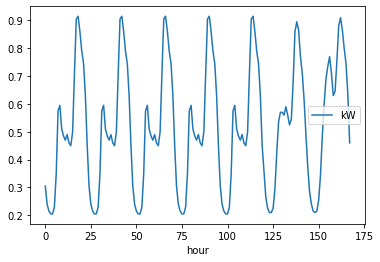

In [16]:
df[:24*7].plot()

### Trend

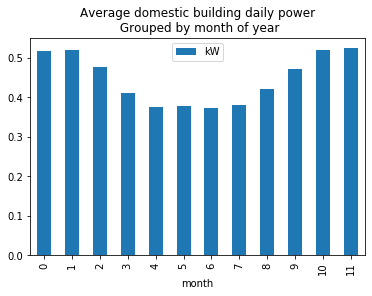

In [17]:
monthly_trend = ( df.groupby(df.index // (len(df)//12)).mean() )
monthly_trend.index.name = 'month'
ax = monthly_trend.plot.bar(title='Average domestic building daily power\n Grouped by month of year')

### Normalised

In [18]:
norm = df / df.sum()
norm.head()

,kW
hour,
0,0.000078
1,0.000061
2,0.000055
3,0.000053
4,0.000053


In [19]:
norm.sum()

kW    1.0
dtype: float64

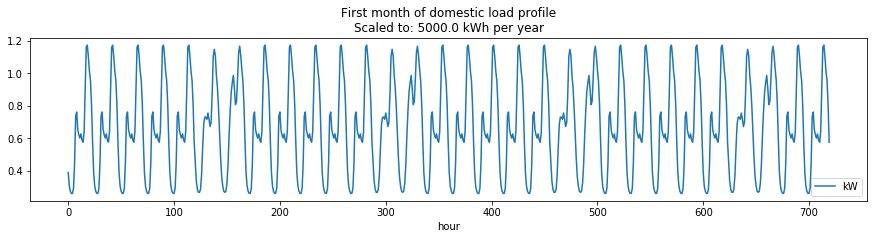

In [20]:
# Example of how to scale to a known annual electricity consumption in kWh
annual_kWh = 5000
scaled = norm * annual_kWh
ax = scaled[:24*30].plot(
    title=f'First month of domestic load profile\nScaled to: {float(scaled.sum())} kWh per year',
    figsize=(15,3))

In [21]:
domestic = norm

## Non-Domestic

In [22]:
df = dfs['Profile Class 3'].copy()
df.head()

,Time,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
0,00:30:00,0.60,0.65,0.68,0.63,0.68,0.67,0.62,0.68,0.68,0.64,0.66,0.70,0.70,0.71,0.73
1,01:00:00,0.57,0.61,0.65,0.59,0.63,0.63,0.59,0.64,0.64,0.60,0.61,0.63,0.77,0.77,0.79
2,01:30:00,0.56,0.60,0.62,0.57,0.62,0.61,0.58,0.61,0.60,0.60,0.59,0.62,0.78,0.78,0.79
3,02:00:00,0.55,0.57,0.59,0.56,0.60,0.58,0.58,0.61,0.59,0.64,0.63,0.64,0.76,0.76,0.76
4,02:30:00,0.54,0.56,0.57,0.56,0.57,0.57,0.57,0.59,0.57,0.63,0.62,0.65,0.76,0.75,0.74


In [23]:
dfs['Profile Class 1'].shape

(48, 16)

In [24]:
df.index = pd.timedelta_range(start='00:00:00', periods=48, freq='30min')
df = df.drop(columns=['Time'])
df = df.resample('1H').mean()
df.head()

,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
00:00:00,0.585,0.630,0.665,0.610,0.655,0.650,0.605,0.660,0.660,0.620,0.635,0.665,0.735,0.740,0.760
01:00:00,0.555,0.585,0.605,0.565,0.610,0.595,0.580,0.610,0.595,0.620,0.610,0.630,0.770,0.770,0.775
02:00:00,0.540,0.555,0.560,0.555,0.570,0.565,0.565,0.590,0.560,0.625,0.620,0.640,0.755,0.750,0.735
03:00:00,0.540,0.550,0.535,0.550,0.575,0.560,0.560,0.575,0.550,0.620,0.595,0.605,0.750,0.745,0.725
04:00:00,0.560,0.550,0.535,0.560,0.575,0.555,0.580,0.575,0.545,0.625,0.600,0.605,0.780,0.760,0.715


### Spring

In [25]:
weekdays = np.tile( df['Spr Wd'].values, 5 )
sat = df['Spr Sat'].values
sun = df['Spr Sun'].values
spring_week = np.concatenate( [weekdays, sat, sun] )
spring = np.tile( spring_week, 6 )

### Summer

In [26]:
weekdays = np.tile( df['Smr Wd'].values, 5 )
sat = df['Smr Sat'].values
sun = df['Smr Sun'].values
summer_week = np.concatenate( [weekdays, sat, sun] )
summer = np.tile( summer_week, 10 )

### High Summer

In [27]:
weekdays = np.tile( df['Hsr Wd'].values, 5 )
sat = df['Hsr Sat'].values
sun = df['Hsr Sun'].values
high_summer_week = np.concatenate( [weekdays, sat, sun] )
high_summer = np.tile( high_summer_week, 7 )

### Autumn

In [28]:
weekdays = np.tile( df['Aut Wd'].values, 5 )
sat = df['Aut Sat'].values
sun = df['Aut Sun'].values
autumn_week = np.concatenate( [weekdays, sat, sun] )
autumn = np.tile( autumn_week, 7 )

### Winter

In [29]:
weekdays = np.tile( df['Wtr Wd'].values, 5 )
sat = df['Wtr Sat'].values
sun = df['Wtr Sun'].values
winter_week = np.concatenate( [weekdays, sat, sun] )
winter = np.tile( winter_week, 22 )

### Year

In [30]:
year_from_spring = np.concatenate([ spring, summer, high_summer, autumn, winter ])
len(year_from_spring)

8736

In [31]:
# Spring starts on 29th March -> ~12th week of year
WEEK = 24*7
index = [ (hour % (WEEK*52)) for hour in range( (12-1)*WEEK, (52+12-1)*WEEK ) ]
len(index)

8736

In [32]:
df = pd.DataFrame(year_from_spring, index=index, columns=['kW'])
df.index.name = 'hour'
df

,kW
hour,
1848,0.620
1849,0.620
1850,0.625
1851,0.620
1852,0.625
...,...
1843,1.030
1844,0.945
1845,0.885


In [33]:
df = df.sort_index()
df

,kW
hour,
0,0.735
1,0.770
2,0.755
3,0.750
4,0.780
...,...
8731,1.030
8732,0.945
8733,0.885


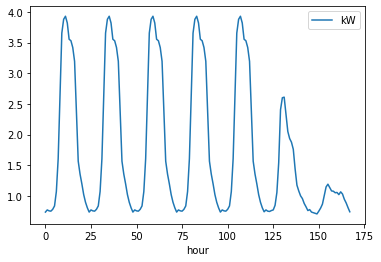

In [34]:
df[:24*7].plot()

### Trend

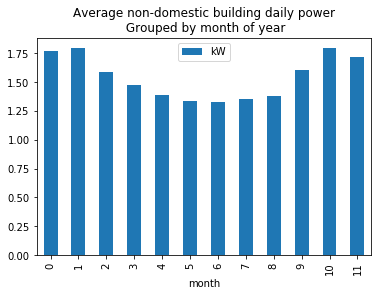

In [35]:
monthly_trend = ( df.groupby(df.index // (len(df)//12)).mean() )
monthly_trend.index.name = 'month'
ax = monthly_trend.plot.bar(title='Average non-domestic building daily power\n Grouped by month of year')

### Normalised

In [36]:
norm = df / df.sum()
norm.head()

,kW
hour,
0,0.000054
1,0.000057
2,0.000056
3,0.000056
4,0.000058


In [37]:
norm.sum()

kW    1.0
dtype: float64

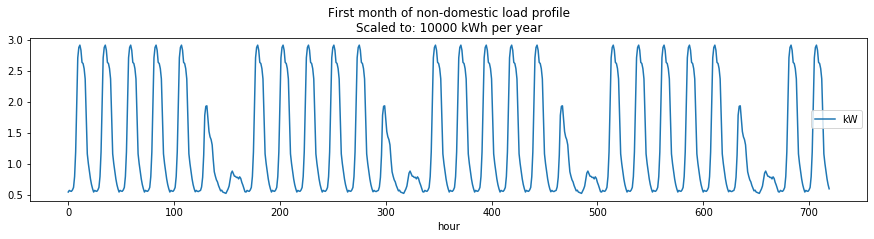

In [38]:
# Example of how to scale to a known annual electricity consumption in kWh
annual_kWh = 10_000
scaled = norm * annual_kWh
ax = scaled[:24*30].plot(
    title=f'First month of non-domestic load profile\nScaled to: {int(round(scaled.sum(), 0))} kWh per year',
    figsize=(15,3))

In [39]:
non_domestic = norm

# Merge

In [57]:
df = pd.DataFrame( [domestic.kW, non_domestic.kW] ).T
df.columns = ['domestic_kW', 'non_domestic_kW']
df

,domestic_kW,non_domestic_kW
hour,,
0,0.000078,0.000054
1,0.000061,0.000057
2,0.000055,0.000056
3,0.000053,0.000056
4,0.000053,0.000058
...,...,...
8731,0.000222,0.000076
8732,0.000205,0.000070
8733,0.000191,0.000066


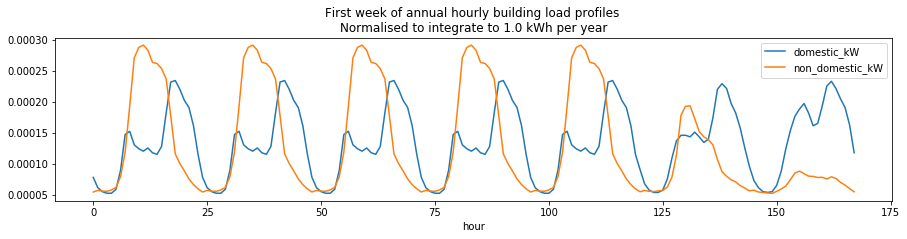

In [58]:
ax = df[:24*7].plot(figsize=(15,3),
                    title='First week of annual hourly building load profiles \n' + \
                           'Normalised to integrate to 1.0 kWh per year')

In [60]:
df.to_csv('cleaned/building_profiles.csv', index=False)